# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 17.09.2019

Мягкий дедлайн: 23:59MSK 29.09.2019 (за каждый день просрочки снимается 2 балла)

Жесткий дедлайн: 23:59MSK 02.10.2019

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а также привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [1]:
#%%bash
#pip3 install ipyleaflet
#jupyter nbextension enable --py --sys-prefix ipyleaflet

После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [2]:
from ipyleaflet import Map, basemaps
import warnings
warnings.filterwarnings('ignore')

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
data = pd.read_csv("train.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
import datetime

data = data.drop(columns=['dropoff_datetime'])
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [6]:
from sklearn.model_selection import train_test_split

y = data["trip_duration"]
X = data.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

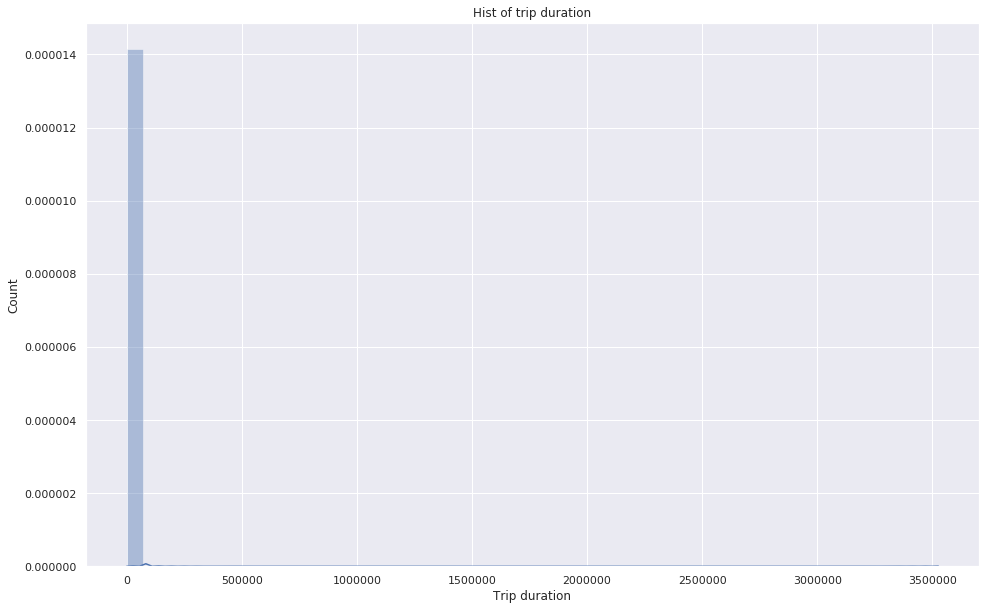

In [7]:
plt.figure(figsize=(16, 10))
sns.distplot(y_train)
plt.xlabel('Trip duration')
plt.ylabel('Count')
plt.title('Hist of trip duration')
plt.show()

In [8]:
data.trip_duration.sort_values().tail()

1234291      86392
355003     1939736
680594     2049578
924150     2227612
978383     3526282
Name: trip_duration, dtype: int64

**В данных присутствуют выбросы, поэтому посмотрим на выборку без них**

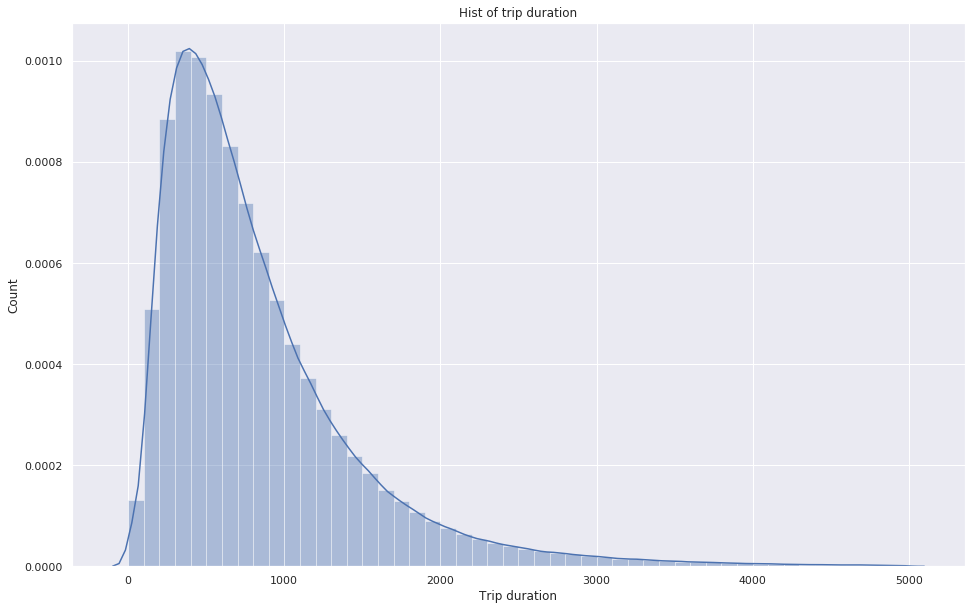

In [9]:
df = data[data.trip_duration < 5000]
y = df["trip_duration"]
X = df.drop(columns=["trip_duration"])
_, _, y_tr, _ = train_test_split(X, y, test_size=0.3, random_state=10)

plt.figure(figsize=(16, 10))
sns.distplot(y_tr)
plt.xlabel('Trip duration')
plt.ylabel('Count')
plt.title('Hist of trip duration')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: В выборке присутсвуют выбросы, есть небольшое количество поездок длительностью около суток, и основное количество поездок длились меньше часа.


В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: В случае RMSE, наличие выбросов может сильно увеличить значение ошибки. А в случае с RMLSE выбросы резко сокращаются, что сводит их влияние на нет.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:
$$\text{MSE}(X, y, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2 \rightarrow min$$
$$\text{RMSLE}(X, y, a) \rightarrow min$$

То есть,

$$\sqrt{\text{MSE}(X, y, \hat{a})} \text{ ~ } \text{RMSLE}(X, y, a)$$


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашим выборкам колонки `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке:

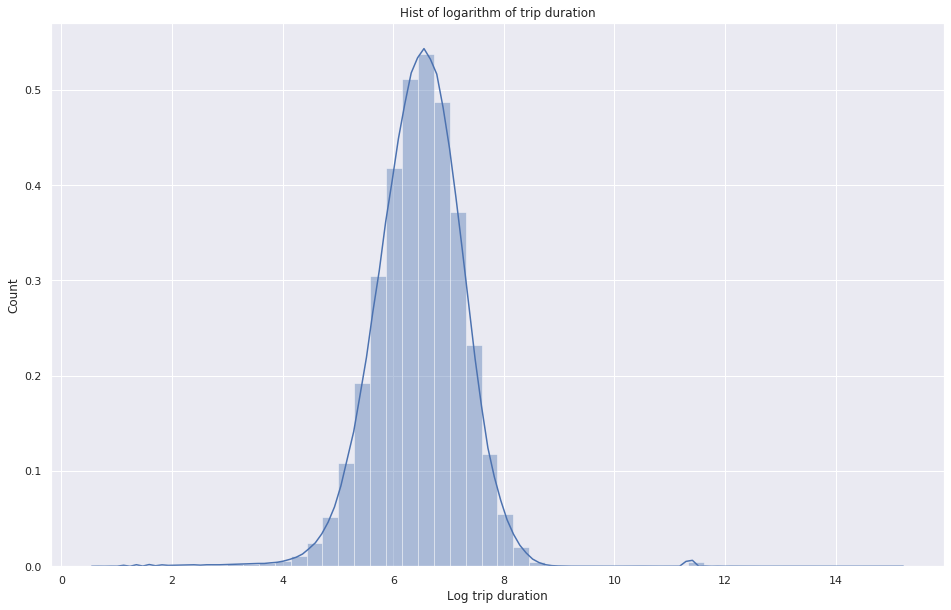

In [10]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
X_train['log_trip_duration'] = y_train
X_test['log_trip_duration'] = y_test
data['log_trip_duration'] = np.log1p(data.trip_duration)
plt.figure(figsize=(16, 10))
sns.distplot(X_train.log_trip_duration)
plt.xlabel('Log trip duration')
plt.ylabel('Count')
plt.title('Hist of logarithm of trip duration')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [11]:
def mse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.mean(error)

best_const = (X_train.log_trip_duration).mean()
print("Train MSE = %.6f" % mse(y_train, best_const))

Train MSE = 0.634235


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

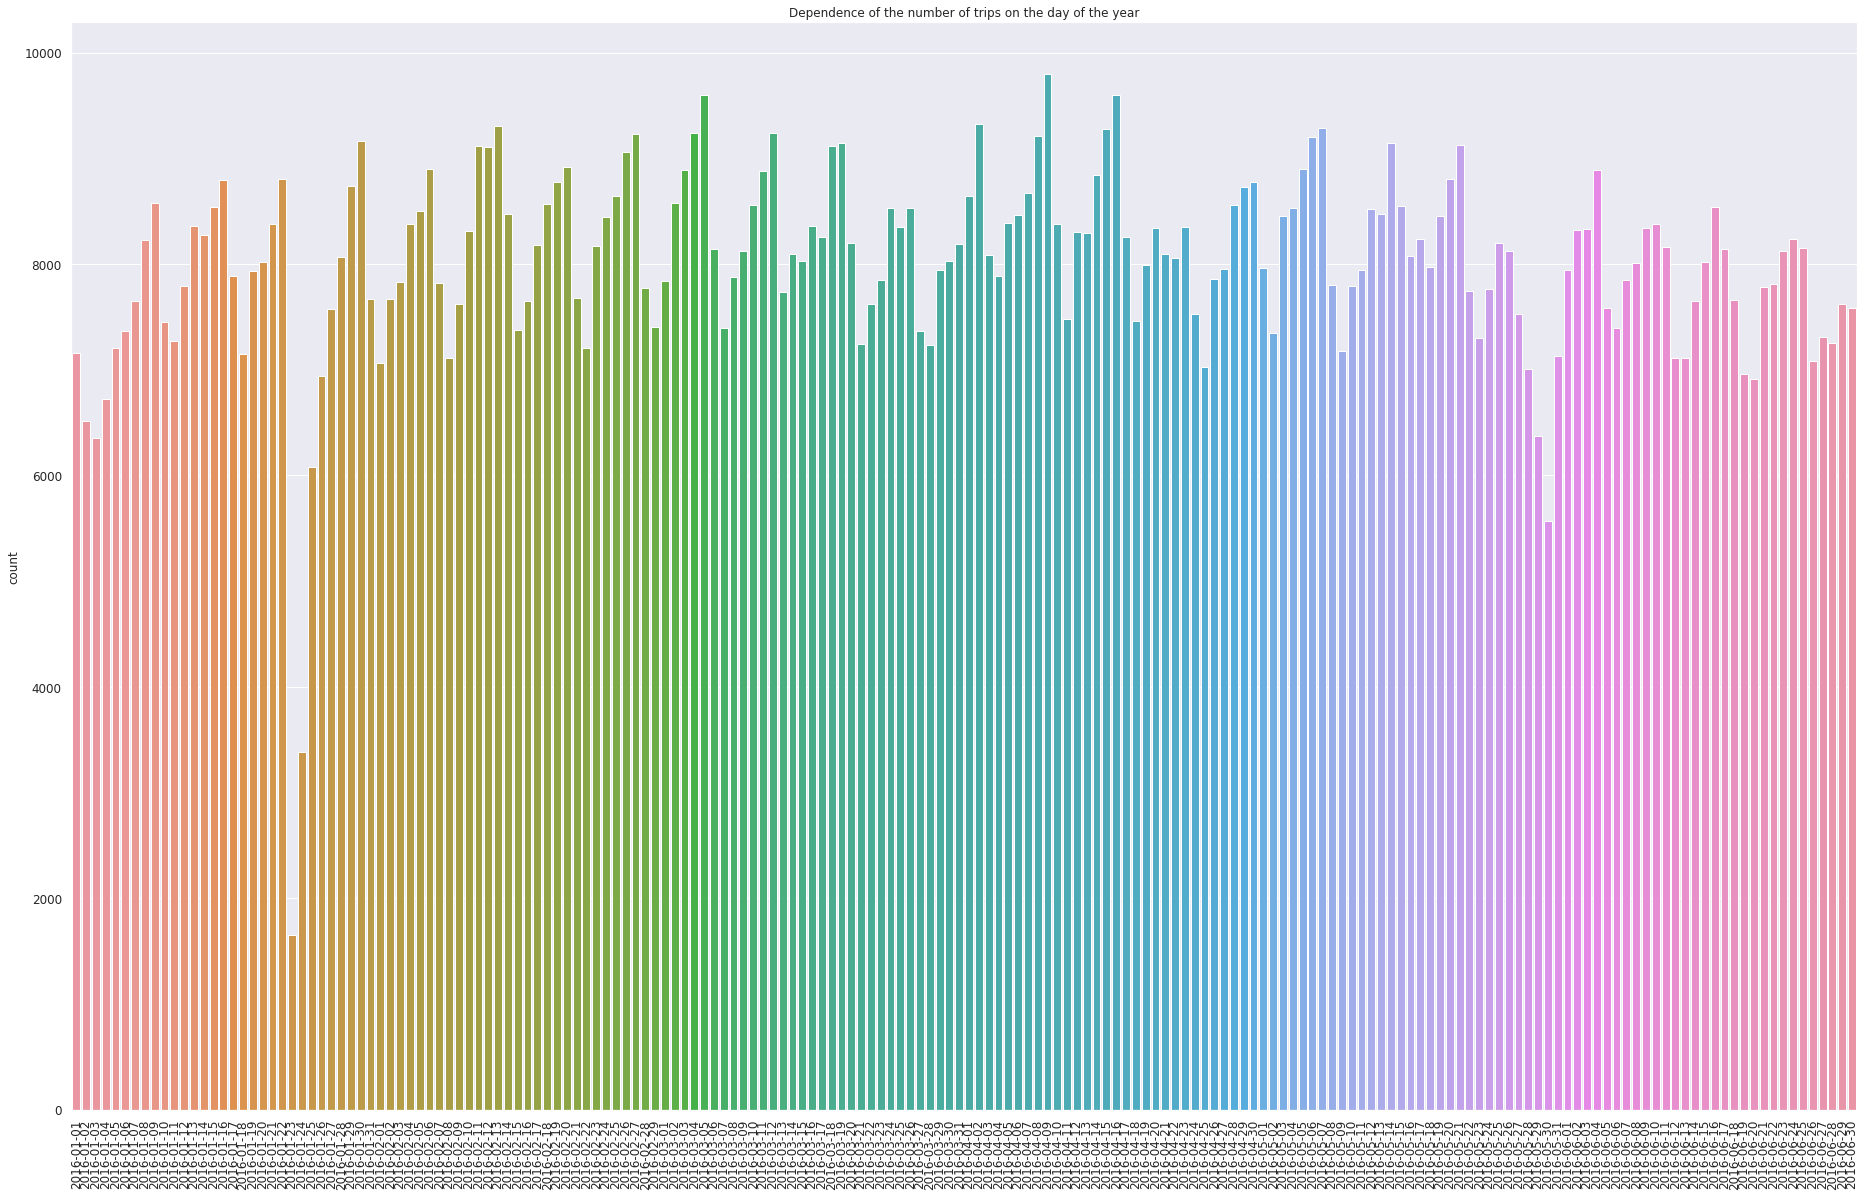

In [12]:
dates = sorted(pd.DatetimeIndex(data['pickup_datetime']).date)
plt.figure(figsize=(32, 20))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize='large')
plt.title('Dependence of the number of trips on the day of the year')
sns.countplot(dates)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: 23-24 января 2016 года власти запретили автомобильное движение в Нью-Йорке из-за снежной бури. 30 мая - memorial day, state holiday in NY state. 

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

Text(0.5, 1, 'Dependence of the number of trips on hours in days')

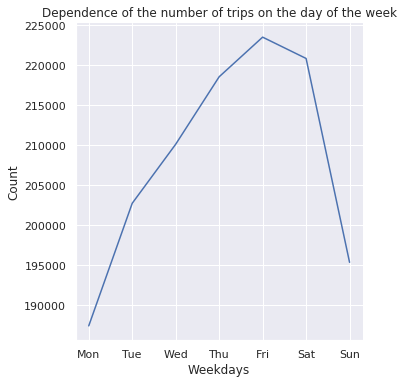

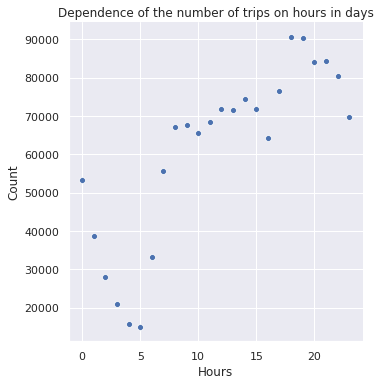

In [13]:
weekdays = pd.DatetimeIndex(data['pickup_datetime']).weekday.value_counts().sort_index()
weekdays.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.relplot(data=weekdays, kind='line', sort=False)
plt.xlabel('Weekdays')
plt.ylabel('Count')
plt.title('Dependence of the number of trips on the day of the week')

hours = pd.DatetimeIndex(data['pickup_datetime']).hour.value_counts().sort_index()
hours.index = [i for i in range(24)]
sns.relplot(data=hours)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Dependence of the number of trips on hours in days')

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

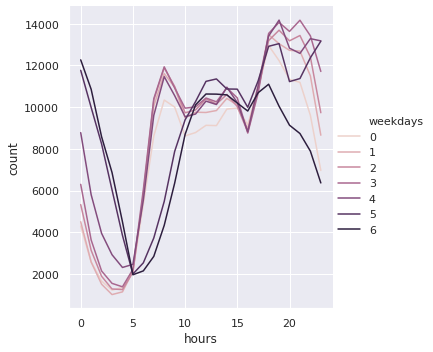

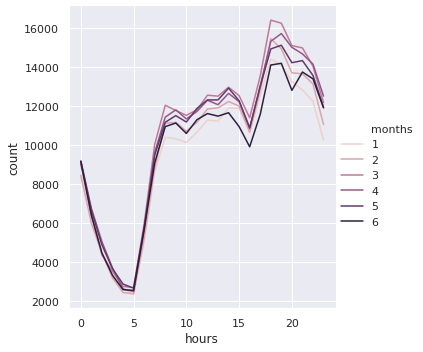

In [14]:
df = data.copy()
df['weekdays'] = pd.DatetimeIndex(data['pickup_datetime']).weekday
df['hours'] = pd.DatetimeIndex(data['pickup_datetime']).hour
df['months'] = pd.DatetimeIndex(data['pickup_datetime']).month
df['count'] = 1

df1 = df.groupby(['hours', 'weekdays'], as_index=False).sum()
sns.relplot(x='hours', y='count', hue='weekdays', data=df1, legend='full', kind="line")

df = df.groupby(['hours', 'months'], as_index=False).sum()
sns.relplot(x='hours', y='count', hue='months', data=df, legend='full', kind="line")
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Месяцы, время суток, дни недели имеют связь между друг другом (например в выходные дни поездок ночью совершается больше, т.к. в выходные люди могут больше времени проводить вне дома) являются хорошими признаками для обучения. В чт, пт и сб совершаеется наибольшое количество поездок (так напрмер в пт наибольшее количество, потому что люди отмечают окончание рабочей недели и вызывают такси, т.к. сами могут находится в нетрезвом состоянии) и особенно в вечернее время (по той же причине). И в более холодные месяцы люди предпочатают добраться до точки назначачения в тепле, чтобы не мерзнуть, поэтому в эти месяцы поездок больше.

**Задание 4 (0.5 баллов)**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

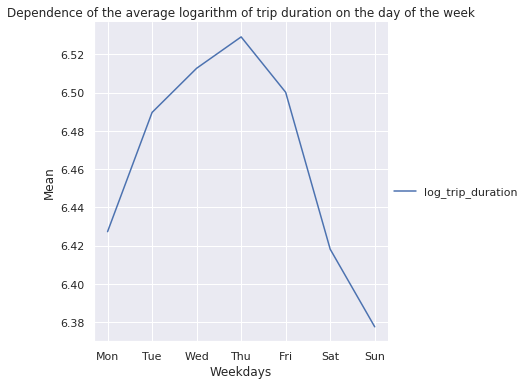

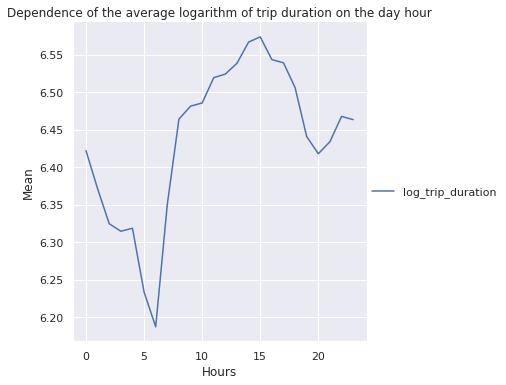

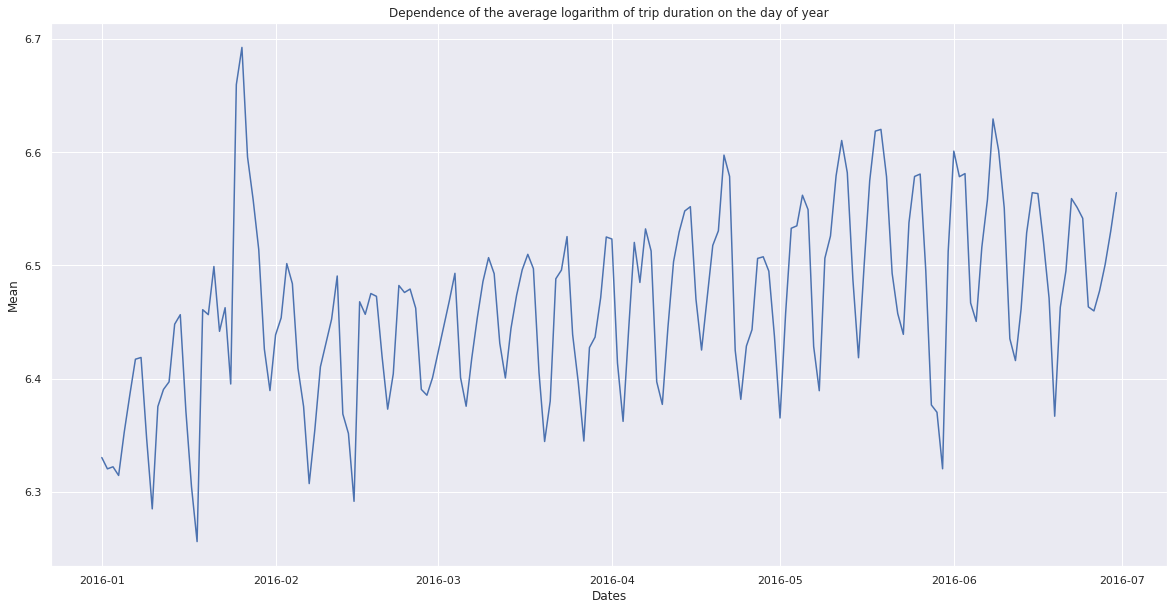

In [15]:
df = X_train.copy()
df['weekday'] = pd.DatetimeIndex(df['pickup_datetime']).weekday
df = df.groupby(['weekday']).mean()
df = df.drop(['vendor_id','passenger_count','pickup_latitude','pickup_longitude','dropoff_latitude', 'dropoff_longitude'], axis=1)
df.index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.relplot(data=df, kind='line', sort=False)
plt.xlabel('Weekdays')
plt.ylabel('Mean')
plt.title('Dependence of the average logarithm of trip duration on the day of the week')

df = X_train.copy()
df['hour'] = pd.DatetimeIndex(df['pickup_datetime']).hour
df = df.groupby(['hour']).mean()
df = df.drop(['vendor_id','passenger_count','pickup_latitude','pickup_longitude','dropoff_latitude', 'dropoff_longitude'], axis=1)
sns.relplot(data=df, kind='line', sort=False)
plt.xlabel('Hours')
plt.ylabel('Mean')
plt.title('Dependence of the average logarithm of trip duration on the day hour')

df = X_train.copy()
df['date'] = pd.DatetimeIndex(df['pickup_datetime']).date
df = df.groupby(['date']).mean()
df = df.drop(['vendor_id','passenger_count','pickup_latitude','pickup_longitude','dropoff_latitude', 'dropoff_longitude'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(df)
plt.xlabel('Dates')
plt.ylabel('Mean')
plt.title('Dependence of the average logarithm of trip duration on the day of year')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ:** Похожи, т. к. чем больше поездок совершается, тем больше среднее значение времени уведичится.
В период 23-24 января среднее значение длительности поездки сильно увеличилось, т. к. буря  стала внезапной, и люди много времени провели в машинах из-за этого, а 30 мая люди заранее знали о событии, поэтому поездок на длительный период не совершалось. Тренд - увелечение времени поездок с увелечением месяца в году. 

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [16]:
data['weekday'] = pd.DatetimeIndex(data['pickup_datetime']).weekday
data['month'] = pd.DatetimeIndex(data['pickup_datetime']).month
data['hour'] = pd.DatetimeIndex(data['pickup_datetime']).hour
data['day_num'] = pd.DatetimeIndex(data['pickup_datetime']).dayofyear
data['is_abnormal'] = False
data.loc[(data.day_num == 23), 'is_abnormal'] = True
data.loc[(data.day_num == 24), 'is_abnormal'] = True
data.loc[(data.day_num == 151), 'is_abnormal'] = True

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ:** Все эти признаки стоит рассматривать как категориальные, т.к. их числовые значения этих признаков не зависят линейно.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

y = data["log_trip_duration"]
X = data.drop(columns=['log_trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ['is_abnormal','weekday','month', 'hour', 'day_num'])
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[['weekday', 'month', 'hour', 'day_num', 'is_abnormal']], y_train)
y_pred = model.predict(X_test[['weekday', 'month', 'hour', 'day_num', 'is_abnormal']])

In [18]:
print("Test MSE = %.6f" % mse(y_test, y_pred))

Test MSE = 0.618542


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [19]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [20]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [21]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [22]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

**Вопрос**: Какие две точки выделяются на карте?

**Ответ:** Два аэропорта

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [23]:
#https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in d
    ecimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    return 6367 * 2 * np.arcsin(np.sqrt(a))

In [24]:
data['haversine'] = haversine_np(data.pickup_longitude, data.pickup_latitude, data.dropoff_longitude, data.dropoff_latitude)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [25]:
#https://stackoverflow.com/questions/13497891/python-getting-around-division-by-zero/13497931#13497931
def safe_ln(x, minval=0.166): #0.166 - знчение, которое получено эксперементальным путем, так корреляция наибольшая
    return np.log(np.clip(x, a_min=minval, a_max=x.max()))

data['log_haversine'] = safe_ln(data.haversine)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [26]:
from scipy.stats import pearsonr

print('Логарифм расстояния:', pearsonr(data.log_haversine, data.log_trip_duration))
print('Просто расстояние:', pearsonr(data.haversine, data.log_trip_duration))

Логарифм расстояния: (0.768163541653857, 0.0)
Просто расстояние: (0.5735948311180159, 0.0)


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

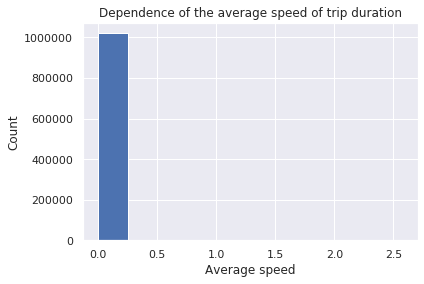

In [27]:
y = data["log_trip_duration"]
X = data.drop(columns=['log_trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

df = X_train.copy()
df['speed'] = df.haversine / df.trip_duration

plt.hist(df.speed)
plt.xlabel('Average speed')
plt.ylabel('Count')
plt.title('Dependence of the average speed of trip duration')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [28]:
df.speed.quantile(.99)

0.011310645456605912

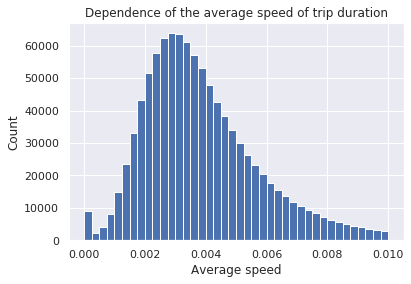

In [29]:
df = df[df.speed < 0.01]
plt.hist(df.speed, bins=40)
plt.xlabel('Average speed')
plt.ylabel('Count')
plt.title('Dependence of the average speed of trip duration')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

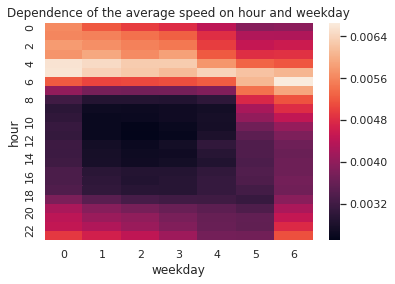

In [30]:
df = X_train.copy()
df['speed'] = df.haversine / df.trip_duration

df = df.loc[:, ['weekday','hour','speed']]
df = df.groupby(['weekday', 'hour'],as_index=False).median()
df = df.pivot('hour', 'weekday', 'speed')

sns.heatmap(df)
plt.title('Dependence of the average speed on hour and weekday')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Возможно потому что эта переменная очень сильно зависит от нашего таргета - времени в пути

In [31]:
print('Не добавлял ее')

Не добавлял ее


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**:  Минимальная в будни с 8 до 20, максимальная ежедневно в 5 утра.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [32]:
data['is_in_traffic_jam'] = False
data.loc[(data.weekday >= 0) & (data.weekday < 6) & (data.hour > 8) & (data.hour < 20),  'is_in_traffic_jam'] = True
data['is_free_roads'] = False
data.loc[(data.hour == 5),  'is_free_roads'] = True

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту.

In [33]:
data['La_Guardia_pickup'] = False
data['La_Guardia_dropoff'] = False
data['John_F_Kennedy_pickup'] = False
data['John_F_Kennedy_dropoff'] = False
data.loc[(round(data.pickup_longitude, 2) == -73.87) & (round(data.pickup_latitude, 2) == 40.77),  'La_Guardia_pickup'] = True
data.loc[(round(data.dropoff_longitude, 2) == -73.87) & (round(data.dropoff_latitude, 2) == 40.77),  'La_Guardia_dropoff'] = True
data.loc[(round(data.pickup_longitude, 2) == -73.78) & (round(data.pickup_latitude, 2) == 40.65),  'John_F_Kennedy_pickup'] = True
data.loc[(round(data.dropoff_longitude, 2) == -73.78) & (round(data.dropoff_latitude, 2) == 40.65),  'John_F_Kennedy_dropoff'] = True

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

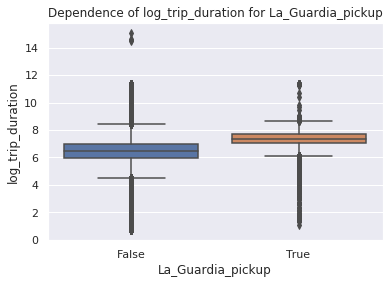

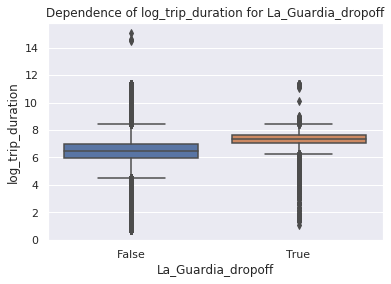

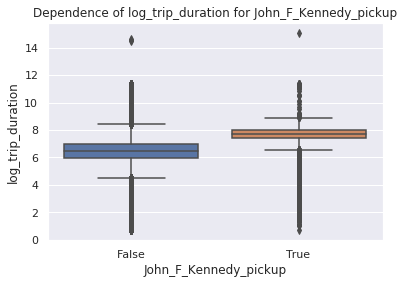

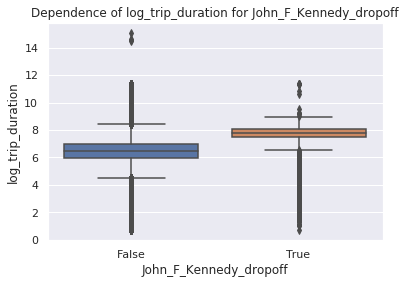

In [34]:
sns.boxplot(x='La_Guardia_pickup', y='log_trip_duration', data=data)
plt.title('Dependence of log_trip_duration for La_Guardia_pickup')
plt.show()

sns.boxplot(x='La_Guardia_dropoff', y='log_trip_duration', data=data)
plt.title('Dependence of log_trip_duration for La_Guardia_dropoff')
plt.show()

sns.boxplot(x='John_F_Kennedy_pickup', y='log_trip_duration', data=data)
plt.title('Dependence of log_trip_duration for John_F_Kennedy_pickup')
plt.show()

sns.boxplot(x='John_F_Kennedy_dropoff', y='log_trip_duration', data=data)
plt.title('Dependence of log_trip_duration for John_F_Kennedy_dropoff')
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ:** Да, т.к. по ним видно, что время пути до аэропорта в среднем больше

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

### Area

left down -74.018009, 40.705128

right down -73.935585, 40.705128

right up -73.935585, 40.802505

left up -74.018009, 40.802505

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, size_x=7, size_y=5):
        self.size_x = size_x
        self.size_y = size_y
    
    def transform(self, X, y=None):
        df = X.copy()
        lats = np.linspace(40.802505, 40.705128, self.size_x)
        lons = np.linspace(-74.018009, -73.935585, self.size_y)
        
        def _cell(lat, lon):
            cell_num = 0 
            for i in range(self.size_x - 1):
                for j in range(self.size_y - 1):
                    cell_num +=  (j + i * (self.size_y - 1) + 1) * ((lon > lons[j]) & (lat < lats[i]) & (lat > lats[i + 1]) & (lon < lons[j + 1]))
            return cell_num - 1
        
        
        df['pickup_cell'] = _cell(df.pickup_latitude, df.pickup_longitude)
        df['dropoff_cell'] = _cell(df.dropoff_latitude, df.dropoff_longitude)
        df = df.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
        return df
    
    def fit(self, x, y=None):
        return self

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [36]:
y = data["log_trip_duration"]
X = data.drop(columns=['log_trip_duration', 'vendor_id', 'passenger_count', 'store_and_fwd_flag'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

categorical = ['is_abnormal','weekday','month', 'hour', 'day_num',
               'La_Guardia_pickup', 'La_Guardia_dropoff',
               'John_F_Kennedy_pickup', 'John_F_Kennedy_dropoff',
               'is_in_traffic_jam', 'is_free_roads']

numeric = ['haversine', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('MapGridTransformer', MapGridTransformer(size_x=7, size_y=5)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print("Test MSE = %.6f" % mse(y_test, y_pred))

Test MSE = 0.228803


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [38]:
print("Unique vendor_id:", len(data.vendor_id.unique()))
print("Unique passenger_count:", len(data.passenger_count.unique()))
print("Unique store_and_fwd_flag:", len(data.store_and_fwd_flag.unique()))

Unique vendor_id: 2
Unique passenger_count: 10
Unique store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

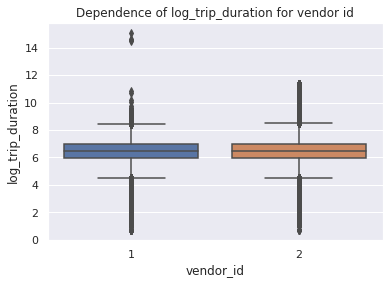

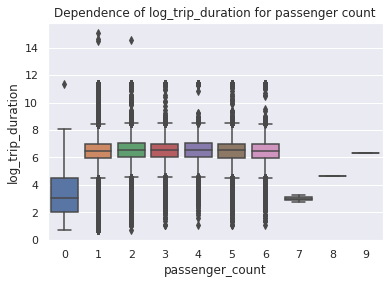

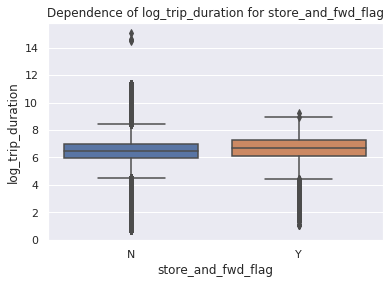

In [39]:
sns.boxplot(x='vendor_id', y='log_trip_duration', data=data)
plt.title('Dependence of log_trip_duration for vendor id')
plt.show()

sns.boxplot(x='passenger_count', y='log_trip_duration', data=data)
plt.title('Dependence of log_trip_duration for passenger count')
plt.show()

sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=data)
plt.title('Dependence of log_trip_duration for store_and_fwd_flag')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [40]:
data.loc[(data.vendor_id == 1), 'vendor_id'] = 0
data.loc[(data.vendor_id == 2), 'vendor_id'] = 1
data.loc[(data.store_and_fwd_flag == 'N'), 'vendor_id'] = 0
data.loc[(data.store_and_fwd_flag == 'Y'), 'vendor_id'] = 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: vendor_id и store_and_fwd_flag нет, т. к. их средние значения почти равны, а vendor_id будет, т.к. длительность поездок без людей заметно меньше и есть поездки, с количеством людей больше 6.   

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [41]:
y = data["log_trip_duration"]
X = data.drop(columns=['log_trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

categorical = ['is_abnormal','weekday','month', 'hour', 'day_num',
               'La_Guardia_pickup', 'La_Guardia_dropoff',
               'John_F_Kennedy_pickup', 'John_F_Kennedy_dropoff',
               'is_in_traffic_jam', 'is_free_roads',
               'vendor_id', 'store_and_fwd_flag', 'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('MapGridTransformer', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
print("Test MSE = %.6f" % mse(y_test, y_pred))

Test MSE = 0.228507


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [43]:
data = data.drop(columns=['store_and_fwd_flag', 'vendor_id'])

y = data["log_trip_duration"]
X = data.drop(columns=['log_trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

categorical = ['is_abnormal','weekday','month', 'hour', 'day_num',
               'La_Guardia_pickup', 'La_Guardia_dropoff',
               'John_F_Kennedy_pickup', 'John_F_Kennedy_dropoff',
               'is_in_traffic_jam', 'is_free_roads', 'passenger_count']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('MapGridTransformer', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Test MSE = %.6f" % mse(y_test, y_pred))

Test MSE = 0.228507


## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

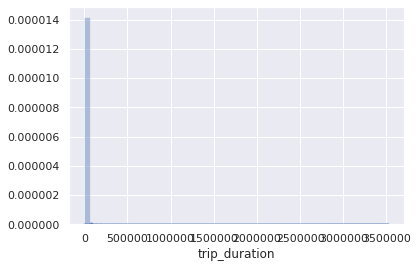

In [44]:
sns.distplot(X_train.trip_duration)
plt.show()

In [45]:
X_train.trip_duration.sort_values().tail()

1234291      86392
355003     1939736
680594     2049578
924150     2227612
978383     3526282
Name: trip_duration, dtype: int64

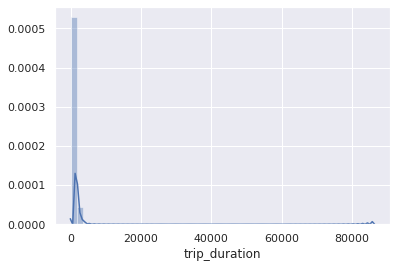

In [46]:
mask = (X_train.trip_duration <= 86392)
sns.distplot(X_train[mask].trip_duration)

In [47]:
X_train.trip_duration.quantile(.001)

7.0

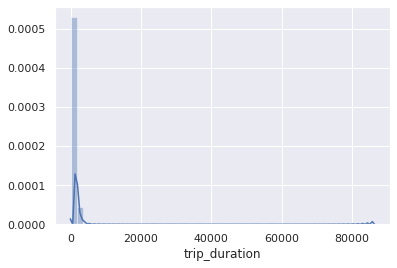

In [48]:
mask &= (X_train.trip_duration >= 7.0)
sns.distplot(X_train[mask].trip_duration)

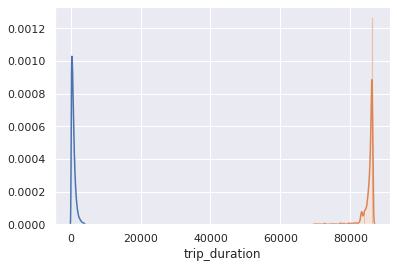

In [49]:
df = X_train[mask].copy()
df = df[df.trip_duration < 4000]
sns.distplot(df.trip_duration)
df = X_train[mask].copy()
df = df[df.trip_duration > 70000]
sns.distplot(df.trip_duration)
plt.show()

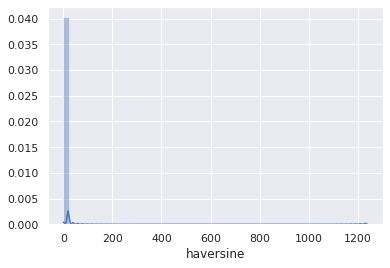

In [50]:
sns.distplot(X_train.haversine)
plt.show()

In [51]:
X_train.haversine.quantile(.999)

24.72595712251168

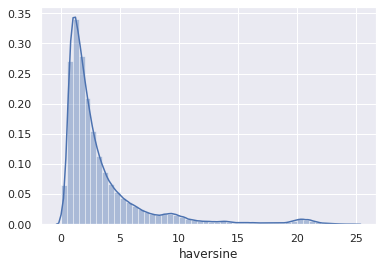

In [52]:
mask &= (X_train.haversine < 25)
sns.distplot(X_train[mask].haversine)

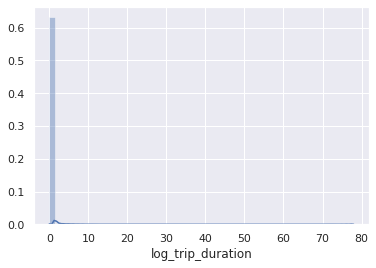

In [53]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)
mask &= (error < np.quantile(error, 0.99))
y_train = y_train[mask]
X_train = X_train[mask]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [54]:
X_train.loc[(X_train.passenger_count > 7 ),  'passenger_count'] = 7 # merge passenger_count = 7, 8, 9 to one column

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [55]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('MapGridTransformer', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE = %.6f" % mse(y_test, y_pred))

Test MSE = 0.229182


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [56]:
print("Size before OneHot:", X_train.shape)

print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1009877, 21)
Size after OneHot: (1009877, 242)



Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?
**Ответ**: нет

In [57]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline(steps=[
    ('MapGridTransformer', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [58]:
print("Test MSE = %.6f" % mse(y_test, y_pred))

Test MSE = 0.630894


Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [59]:
zero_weights = list()

X_train_new, X_validate, y_train_new, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

alphas = np.logspace(-4, -1, 10)
for alpha in alphas:
    searcher = Pipeline(steps=[
        ('MapGridTransformer', MapGridTransformer()),
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=alpha))
    ])
    model = searcher.fit(X_train_new, y_train_new)
    y_pred = model.predict(X_validate)
    zero_weights.append(np.sum(searcher.steps[-1][-1].coef_ == 0))
    print("Alpha = %.5f: Validate MSE = %.8f" % (alpha, mse(y_validate, y_pred)))

best_alpha = alphas.min()
print("Best_alpha:", best_alpha)

Alpha = 0.00010: Validate MSE = 0.15632732
Alpha = 0.00022: Validate MSE = 0.15692002
Alpha = 0.00046: Validate MSE = 0.15786964
Alpha = 0.00100: Validate MSE = 0.15951928
Alpha = 0.00215: Validate MSE = 0.16201815
Alpha = 0.00464: Validate MSE = 0.16570242
Alpha = 0.01000: Validate MSE = 0.17048553
Alpha = 0.02154: Validate MSE = 0.17305289
Alpha = 0.04642: Validate MSE = 0.18218365
Alpha = 0.10000: Validate MSE = 0.19747185
Best_alpha: 0.0001


In [60]:
pipeline = Pipeline(steps=[
        ('MapGridTransformer', MapGridTransformer()),
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=0.0001))
    ])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE = %.6f" % mse(y_test, y_pred))

Test MSE = 0.229405


Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

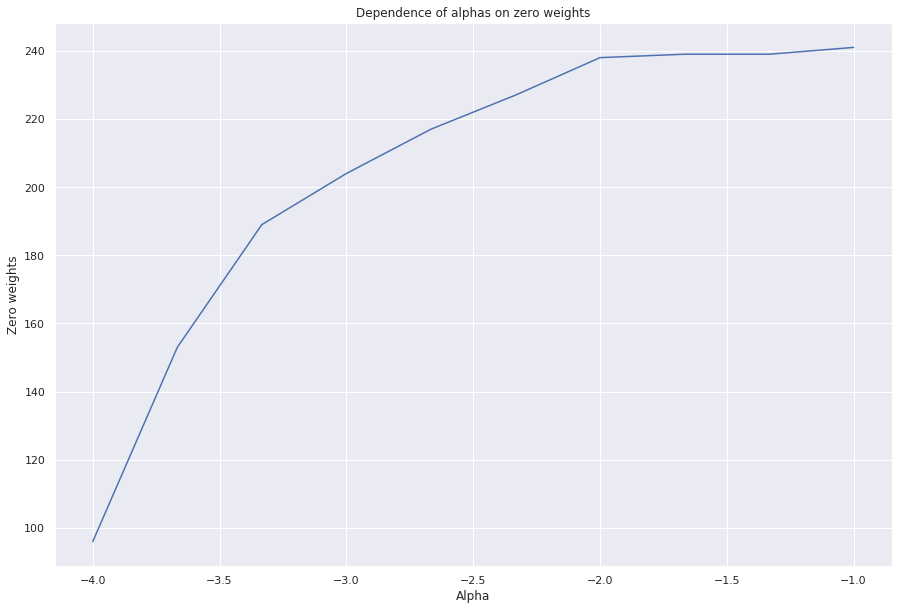

In [61]:
plt.figure(figsize=(15,10))
plt.plot(np.log10(alphas), zero_weights)
plt.xlabel('Alpha')
plt.ylabel('Zero weights')
plt.title('Dependence of alphas on zero weights')
plt.show()

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**: Т. к. потенциально популярные маршруты будут и наиболее загруженными, что повысит время поездки, это может помочь при обучении. Самостоятельно вытащить не может, т. к. yt этот факт выше не очевиден для модели. 

In [62]:
df = MapGridTransformer().fit_transform(X_train)
df['pickup_dropoff_pair'] = df.apply(lambda x:'%s, %s' % (x.pickup_cell, x.dropoff_cell), axis = 1)

max_pairs = df.groupby('pickup_dropoff_pair').count().sort_values('id').tail(100)

df['often_trips'] = '-1'
for coord in max_pairs.index.values:
    df.loc[(df.pickup_dropoff_pair == coord), 'often_trips'] = str(coord)

X_train['often_trips'] = df['often_trips']

In [63]:
df = MapGridTransformer().fit_transform(X_test)
df['pickup_dropoff_pair'] = df.apply(lambda x:'%s, %s' % (x.pickup_cell, x.dropoff_cell), axis = 1)

max_pairs = df.groupby('pickup_dropoff_pair').count().sort_values('id').tail(100)

df['often_trips'] = '-1'
for coord in max_pairs.index.values:
    df.loc[(df.pickup_dropoff_pair == coord), 'often_trips'] = str(coord)

X_test['often_trips'] = df['often_trips']

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [64]:
categorical.append('often_trips')

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('MapGridTransformer', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE = %.6f" % mse(y_test, y_pred))

Test MSE = 0.213752


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

**Ответ**: Расстояние городских кварталов — метрика, введённая Германом Минковским. Согласно этой метрике, расстояние между двумя точками равно сумме модулей разностей их координат. Название «манхэттенское расстояние» связано с уличной планировкой Манхэттена. Т. к. манхеттенское расстояние не зависит от выбранного маршрута, то это поакажет, насколько был оптимален маршрут водителя, в зависимости от времени в пути.

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [65]:
#https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python

def rotate(data,  pickup, dropoff, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    df = data.copy()
    
    ox, oy = pickup
    px, py = point

    df['pickup_longitude_rotated']  = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    df['pickup_latitude_rotated'] = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)

    ox, oy = dropoff

    df['dropoff_longitude_rotated'] = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    df['dropoff_latitude_rotated'] = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)

    return df

In [75]:

X_train = rotate(X_train, (-74.018009, 40.705128), (X_train.pickup_longitude, X_train.pickup_latitude), (X_train.dropoff_longitude, X_train.dropoff_latitude), math.radians(35))

X_train['manhattan_distance'] = (X_train.dropoff_longitude_rotated - X_train.pickup_longitude_rotated).abs() + (X_train.dropoff_latitude_rotated - X_train.pickup_latitude_rotated).abs()
X_train['log_manhattan_distance'] = np.log(X_train.manhattan_distance)

In [76]:
X_test = rotate(X_test, (-74.018009, 40.705128), (X_test.pickup_longitude, X_test.pickup_latitude), (X_test.dropoff_longitude, X_test.dropoff_latitude), math.radians(35))

X_test['manhattan_distance'] = (X_test.dropoff_longitude_rotated - X_test.pickup_longitude_rotated).abs() + (X_test.dropoff_latitude_rotated - X_test.pickup_latitude_rotated).abs()
X_test['log_manhattan_distance'] = np.log(X_test.manhattan_distance)

In [77]:
show_circles_on_map(X_train.sample(200), "pickup_latitude_rotated", "pickup_longitude_rotated", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

![image](image.png)

In [78]:
X_train = X_train.drop(columns=['dropoff_longitude_rotated', 'pickup_longitude_rotated', 'dropoff_latitude_rotated', 'pickup_latitude_rotated'])
X_test = X_test.drop(columns=['dropoff_longitude_rotated', 'pickup_longitude_rotated', 'dropoff_latitude_rotated', 'pickup_latitude_rotated'])

In [79]:
print('Логарифм расстояния:', pearsonr(X_train.log_haversine, y_train))
print('Просто расстояние:', pearsonr(X_train.log_manhattan_distance, y_train))

Логарифм расстояния: (0.8124007203328326, 0.0)
Просто расстояние: (0.03576093744704071, 5.330146282166005e-283)


Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [80]:
numeric.append('log_manhattan_distance')

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('MapGridTransformer', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE = %.8f" % mse(y_test, y_pred))

Test MSE = 0.21344380
